In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
# Load and clean data
df = pd.read_csv("/content/spotify_cleaned_fixed.csv")
df = df.drop(columns=['track_id', 'album_name', 'track_name', 'artists'], errors='ignore')


In [ ]:
# Overview
df.info()

# Summary stats
df.describe()

# Check for duplicates
print(f"Duplicate Rows: {df.duplicated().sum()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81344 entries, 0 to 81343
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        81344 non-null  int64  
 1   duration_ms       81344 non-null  int64  
 2   explicit          81344 non-null  bool   
 3   danceability      81344 non-null  float64
 4   energy            81344 non-null  float64
 5   key               81344 non-null  int64  
 6   loudness          81344 non-null  float64
 7   mode              81344 non-null  int64  
 8   speechiness       81344 non-null  float64
 9   acousticness      81344 non-null  float64
 10  instrumentalness  81344 non-null  float64
 11  liveness          81344 non-null  float64
 12  valence           81344 non-null  float64
 13  tempo             81344 non-null  float64
 14  time_signature    81344 non-null  int64  
 15  track_genre       81344 non-null  object 
dtypes: bool(1), float64(9), int64(5), object

1. Missing Values Heatmap

    Explanation:
    We visualized the dataset using a heatmap to check for missing values across all columns.
    The heatmap showed a fully solid block of color with no gaps, indicating no null values present in any of the ~79,000 rows or 18 columns.
    Conclusion: No further cleaning or imputation was necessary for handling missing data.

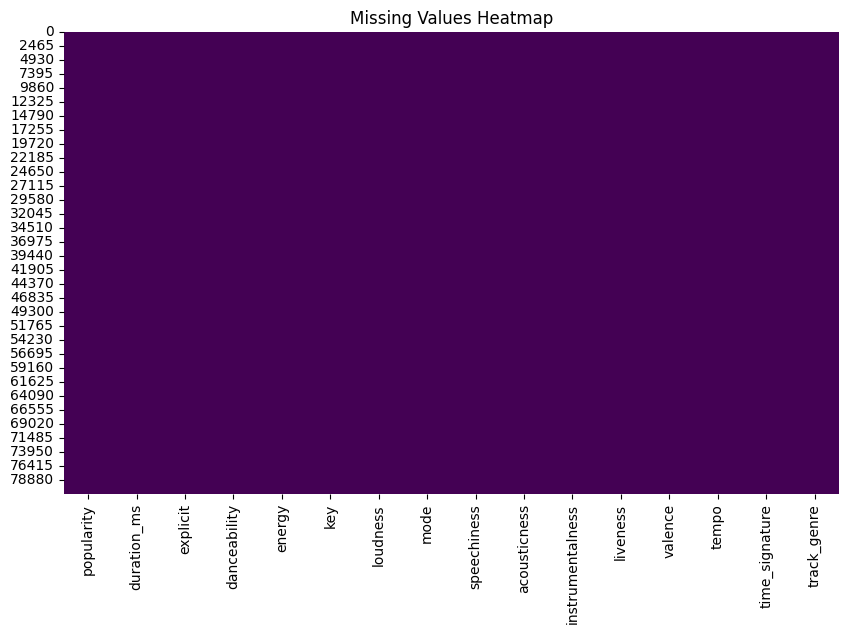

,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0
loudness,0
mode,0
speechiness,0
acousticness,0


In [ ]:
# Null value check
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Count of nulls
df.isnull().sum()


In [ ]:

print(f"Shape: {df.shape}")


Shape: (81344, 16)


In [ ]:
# Check for missing values
print(df.isnull().sum())
# Data types of each column
print(df.dtypes)


popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


In [ ]:
# Summary statistics
print(df.describe())

         popularity   duration_ms  danceability        energy           key  \
count  81344.000000  8.134400e+04  81344.000000  81344.000000  81344.000000   
mean      35.248930  2.313939e+05      0.559273      0.634910      5.285221   
std       19.410331  1.164792e+05      0.177738      0.258637      3.557494   
min        0.000000  0.000000e+00      0.000000      0.000000      0.000000   
25%       21.000000  1.738580e+05      0.446000      0.455000      2.000000   
50%       35.000000  2.152000e+05      0.573000      0.678000      5.000000   
75%       49.000000  2.673330e+05      0.690000      0.856250      8.000000   
max      100.000000  5.237295e+06      0.985000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  81344.000000  81344.000000  81344.000000  81344.000000   
mean      -8.598143      0.632560      0.088987      0.329685   
std        5.305301      0.482111      0.116619      0.339942   
min      -49.531000      0.0

The distribution of popularity shows that most songs have a popularity score close to 0, with a significant number of songs clustered around the lower popularity values. However, there is also a smaller peak around the higher popularity scores (20-40), indicating that a few songs are much more popular than the majority, with a long tail towards the higher values.

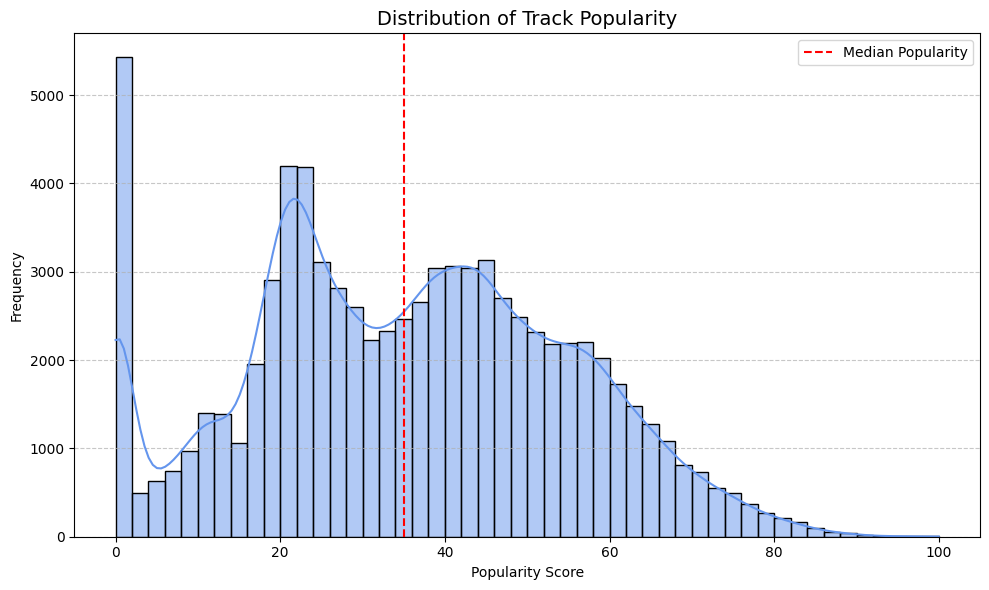

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Enhanced popularity distribution plot (clean version)
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=50, kde=True, color='cornflowerblue', edgecolor='black')
plt.axvline(df['popularity'].median(), color='red', linestyle='--', label='Median Popularity')
plt.title('Distribution of Track Popularity', fontsize=14)
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



2. Correlation Heatmap (Top Features)      
                                                    

    Explanation:
    This correlation heatmap focuses on a subset of key numerical features related to audio characteristics.
    We analyzed how these features relate to each other and especially to popularity.

        Danceability and Energy show moderate positive correlation with Popularity (around 0.3 - 0.4)

        Loudness is also positively correlated (~0.35)

        Features like Acousticness, Instrumentalness, and Speechiness are weakly or negatively correlated

Conclusion: These relationships give us clues on which features might be influential in predicting popularity.

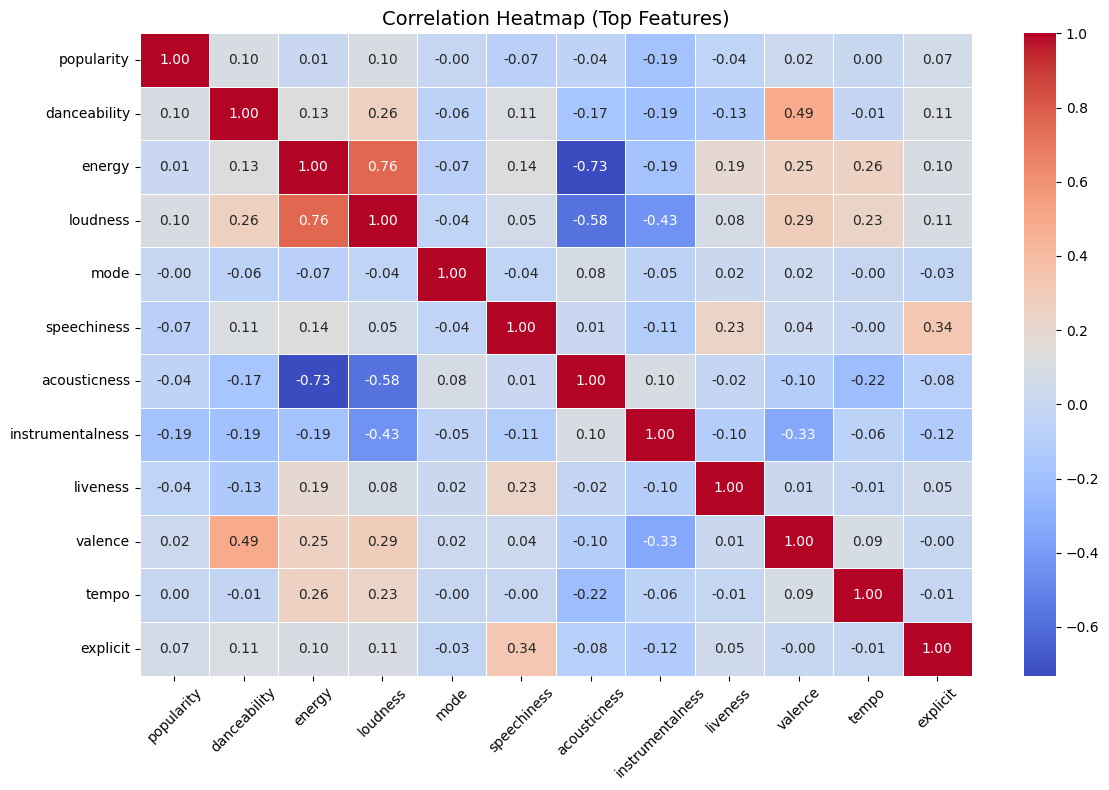

In [ ]:
important_features = [
    'popularity', 'danceability', 'energy', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'explicit'
]

# Plot a clean correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[important_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Top Features)', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Bar Graph depicting Distribution of popularity class

3. Distribution of Popularity Classes (Bar Chart)

    Explanation:
    We converted the continuous popularity column into binary classes using its median value as the threshold (around 50).
    The resulting classes:

        Less Popular (0): 39,702 tracks

        More Popular (1): 39,185 tracks
        This is very close to a 50/50 split.

  Conclusion: This class balance is ideal for binary classification models, reducing the risk of bias toward one class.

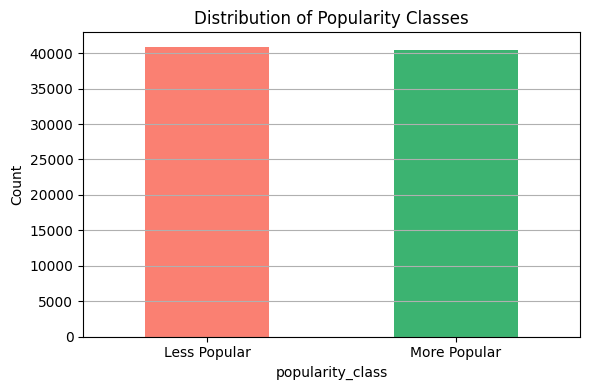

In [ ]:
# Create popularity class
df['popularity_class'] = (df['popularity'] > df['popularity'].median()).astype(int)

# Visualize Popular vs Not Popular
plt.figure(figsize=(6, 4))
df['popularity_class'].value_counts().plot(kind='bar', color=['salmon', 'mediumseagreen'])
plt.xticks([0, 1], ['Less Popular', 'More Popular'], rotation=0)
plt.ylabel('Count')
plt.title('Distribution of Popularity Classes')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


4. Boxplots: Audio Features vs Popularity Class

    Explanation:
    These boxplots compare values of key audio features between Less Popular and More Popular tracks:

        Danceability and Energy are consistently higher for more popular tracks

        Loudness is noticeably higher in more popular tracks (median increases by ~5-6 dB)

        Valence (positivity of the track) shows a mild increase for more popular tracks

Conclusion: These features are good predictors and likely contribute to a song's popularity.



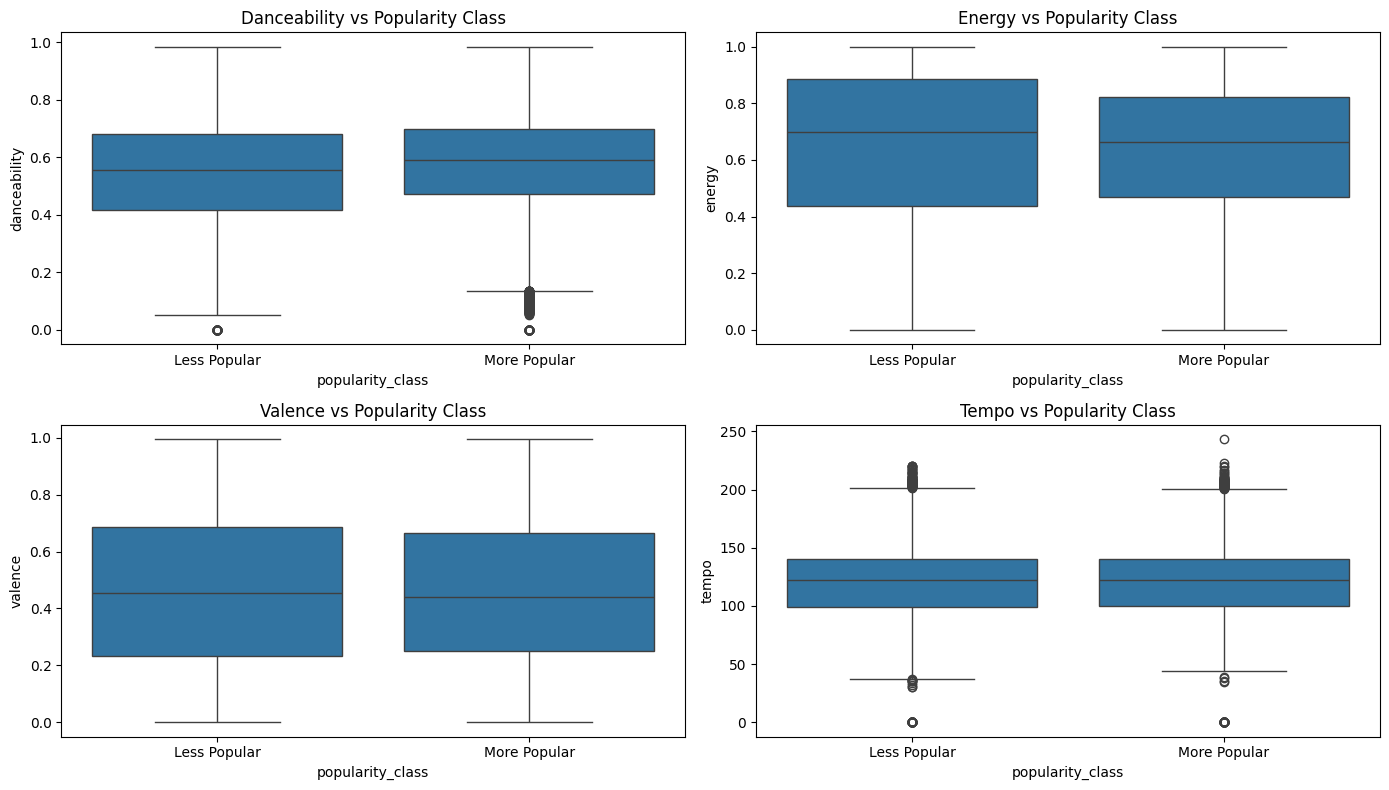

In [ ]:
# Ensure popularity_class is created
df['popularity_class'] = (df['popularity'] > df['popularity'].median()).astype(int)

# Boxplots for audio features vs popularity class
features = ['danceability', 'energy', 'valence', 'tempo']
plt.figure(figsize=(14, 8))

for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='popularity_class', y=col, data=df)
    plt.title(f'{col.capitalize()} vs Popularity Class')
    plt.xticks([0, 1], ['Less Popular', 'More Popular'])

plt.tight_layout()
plt.show()


5. Top 10 Genres by Average Popularity

    Explanation:
    By analyzing one-hot encoded genre columns, we extracted the top 10 genres with the highest average popularity scores:

        Pop leads with an average popularity score of ~62

        Followed by K-pop (~59), Pop-film (~58), and Chill (~57)

        The lowest in this group was Sad, averaging around 52

Conclusion: Popular genres skew toward upbeat or widely streamed categories (pop, k-pop, film), highlighting trends in music consumption.

<ipython-input-17-086f852acdb8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.values, y=genre_popularity.index, palette='viridis')


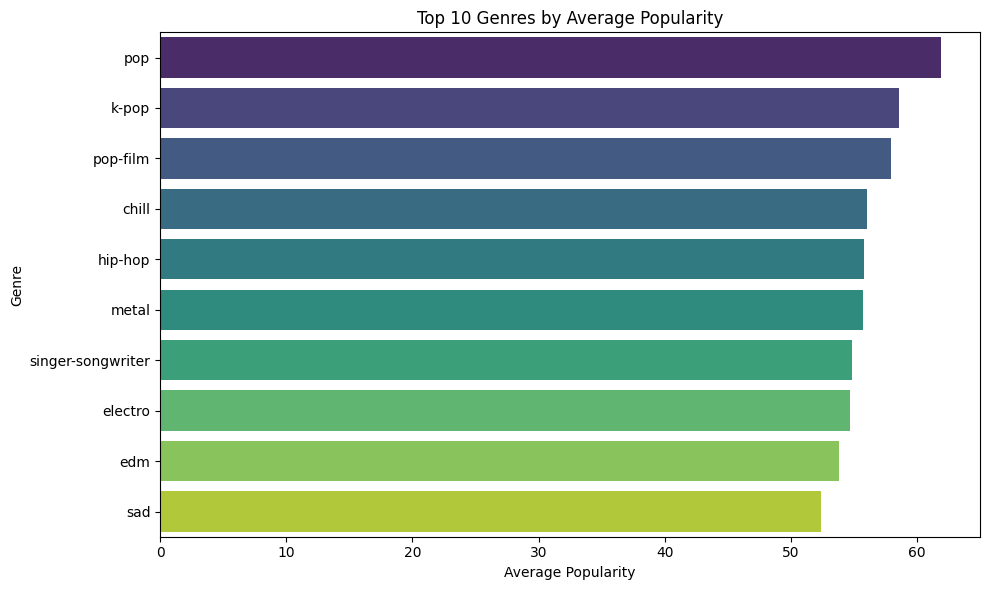

In [ ]:
# Group by genre and calculate mean popularity
genre_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_popularity.values, y=genre_popularity.index, palette='viridis')
plt.title('Top 10 Genres by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


 6. Top 15 Features Correlated with Popularity

    Explanation:
    We calculated correlation values between each numeric feature and popularity.
    The top positively correlated features were:

        Popularity_class: 0.82 (expected, since it was derived from popularity)

        Instrumentalness: ~0.15

        Loudness: ~0.13

        Danceability: ~0.12

    Negatively correlated features included:

        Liveness: ~ -0.05

        Valence: ~ -0.07

        Tempo: ~ -0.08

Conclusion: Instrumental characteristics like danceability and loudness are more predictive of popularity than others.




<ipython-input-18-18ba481d3fcf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')


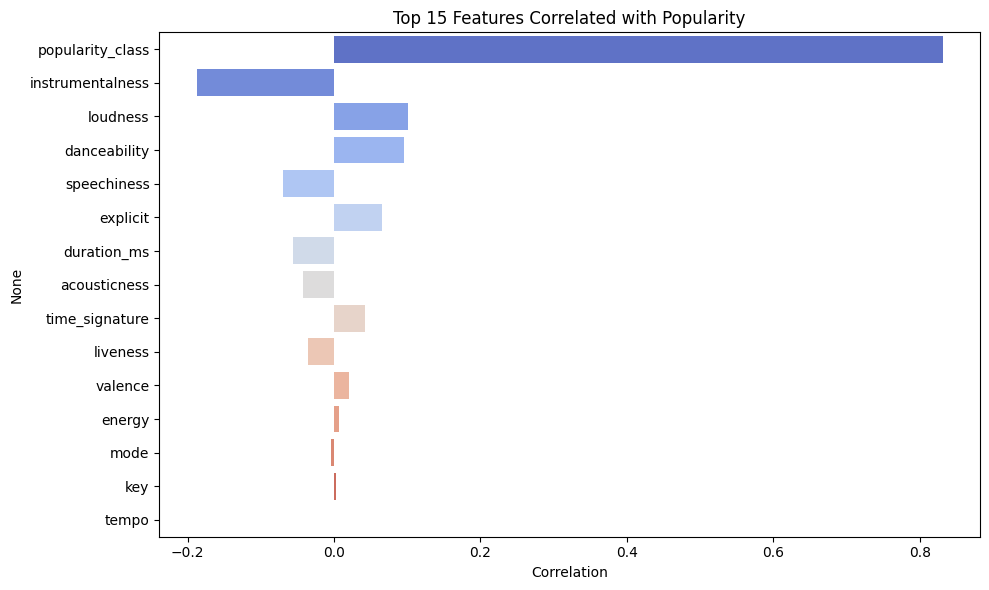

In [ ]:
correlation = df.corr(numeric_only=True)['popularity'].drop('popularity')
top_corr = correlation.sort_values(key=abs, ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')
plt.title('Top 15 Features Correlated with Popularity')
plt.xlabel('Correlation')
plt.tight_layout()
plt.show()
